# parallelization practice

In [20]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  32


I think my problem is that I keep asking it to use a different subprocess for each tiny job rather then splitting the job up into equal peices for each processor. 

In [49]:
ks_list = []
test_m = np.array(data_mutant[0:501], dtype=object)
test_c = np.array(data_control[0:501], dtype=object)
test_l = list(range(len(data_mutant)))

In [51]:
split_m = np.array_split(test_m, 20)

In [52]:
split_c = np.array_split(test_c, 20)

In [53]:
def get_ks (mutant, control):
    ks_list = []
    for tr_m, tr_c in zip (mutant, control):
        if len(tr_m) > 200 and sum(tr_m) > 100 and sum(tr_c) > 100:
            position = np.array(list(range(len(tr_m))))
            smoothed_vec_m, cumul_m = get_smoothed_vector(position, tr_m+0.00000000001)
            smoothed_vec_c, cumul_c = get_smoothed_vector(position, tr_c+0.00000000001)
            ks = stats.ks_2samp(cumul_m, cumul_c)[0]
            ks_list.append(ks)
    return ks_list

In [54]:
pool = mp.Pool(20)

In [55]:
ks_results = [pool.apply(get_ks, args = (mutant, control)) for mutant, control in zip(split_m, split_c)]

In [57]:
pool.close()

In [58]:
flat_list = [item for sublist in ks_results for item in sublist]

In [62]:
len(flat_list)

323

In [115]:
# Find the correlation between all of the controls and the samples.
# Note that many of the lowest values spring from very short transcripts or transcripts with few reads. 
ks_list = []
for tr_m, tr_c, index in zip(test_m, test_c, test_l):
    if len(tr_m) > 200 and sum(tr_m) > 100 and sum(tr_c) > 100:
        position = np.array(list(range(len(tr_m))))
        smoothed_vec_m, cumul_m = get_smoothed_vector(position, tr_m+0.00000000001)
        smoothed_vec_c, cumul_c = get_smoothed_vector(position, tr_c+0.00000000001)
        ks = stats.ks_2samp(cumul_m, cumul_c)[0]
        #if ks < 0.85 :
        #    print(protein_coding[index].attr["gene_name"])
        ks_list.append(ks)

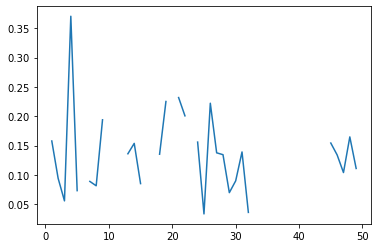

In [122]:
plt.plot(ks_results)

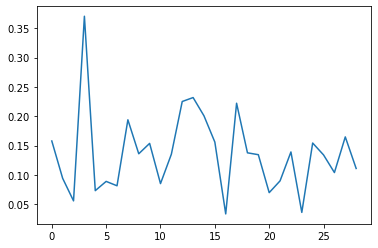

In [116]:
plt.plot(ks_list)

In [139]:
import multiprocessing
import time

data = (
    ['a', '2'], ['b', '4'], ['c', '6'], ['d', '8'],
    ['e', '1'], ['f', '3'], ['g', '5'], ['h', '7']
)

def mp_worker (inputs, the_time):
    print(" Processs %s\tWaiting %s seconds" % (inputs, the_time))
    time.sleep(int(the_time))
    print(" Process %s\tDONE" % inputs)

def mp_handler():
    p = multiprocessing.Pool(2)
    p.map(mp_worker, data)

if __name__ == '__main__':
    mp_handler()

TypeError: mp_worker() missing 1 required positional argument: 'the_time'

Process ForkPoolWorker-144:
Process ForkPoolWorker-145:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/keeganfl/miniconda3/envs/plastid/lib/python3.8/m